In [ ]:
!pip install torch
!pip install git+https://github.com/huggingface/diffusers
!pip install transformers
!pip install ftfy
!pip install spacy
!pip install accelerate
!pip install datasets[vision]

In [2]:
import numpy
import json
import time
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import pandas as pd
import torch
import accelerate
from datasets import load_dataset, Image
import torchvision
import os
import shutil

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from diffusers import DiffusionPipeline

#pipeline = DiffusionPipeline.from_pretrained("")

In [5]:
from google.colab import output
output.enable_custom_widget_manager()

In [6]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [7]:
!accelerate config default

2023-03-10 00:26:15.244570: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-10 00:26:15.244662: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-10 00:26:15.244680: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


Resolving data files:   0%|          | 0/295 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/default-92411c82c3a24273/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


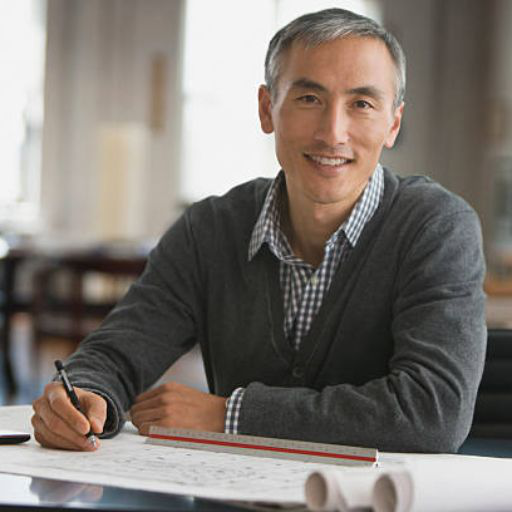

In [8]:
dataset = load_dataset("imagefolder", data_dir="/content/drive/Shareddrives/Unbound/training-data/new", split="train")
train_data = dataset
train_data[0]["image"]

In [ ]:
#dreambooth with encoder and UNET

MODEL_NAME="CompVis/stable-diffusion-v1-4"
INSTANCE_DIR="path_to_training_images"
CLASS_DIR="path_to_class_images"
OUTPUT_DIR="path_to_saved_model"

accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --train_text_encoder \
  --instance_data_dir=$INSTANCE_DIR \
  --class_data_dir=$CLASS_DIR \
  --output_dir=$OUTPUT_DIR \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --instance_prompt="a photo of sks dog" \
  --class_prompt="a photo of dog" \
  --resolution=512 \
  --train_batch_size=1 \
  --use_8bit_adam
  --gradient_checkpointing \
  --learning_rate=2e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --num_class_images=200 \
  --max_train_steps=800

In [ ]:
%cd /content
MODEL_NAME = "runwayml/stable-diffusion-v1-5"
TRAIN_DIR = "/content/drive/Shareddrives/Unbound/firstcheckpoint"
OUTPUT_DIR = "/output/data_sample/"

!accelerate launch train_text_to_image.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --train_data_dir=$TRAIN_DIR \
  --use_ema \
  --resolution=512 --center_crop --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --mixed_precision="fp16" \
  --max_train_steps=15000 \
  --learning_rate=1e-06 \
  --max_grad_norm=1 \
  --lr_scheduler="constant" --lr_warmup_steps=1000 \
  --output_dir=${OUTPUT_DIR}

In [12]:
MODEL_NAME="stabilityai/stable-diffusion-2-1"
INSTANCE_DIR="/content/drive/Shareddrives/Unbound/training-data/new"
OUTPUT_DIR="/output/data_sample/"

! accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME  \
  --train_text_encoder \
  --instance_data_dir=$INSTANCE_DIR \
  --output_dir=$OUTPUT_DIR \
  --instance_prompt="a photo of sks dog" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=1e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=800

2023-03-10 00:59:55.255952: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-10 00:59:55.256055: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-10 00:59:55.256077: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
The following values were not passed to `accelerate launch` and had defaults used instead:
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass 